In [79]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

datadir = "/Users/audreatabadero/Downloads/finaltry1"
categories = ["MS1", "MS2", "MS3", "MS4", "MS5", "MS6", "MS7"]
#removes hidden files
root = "/Users/audreatabadero/Downloads/finaltry1"
for item in os.listdir(root):
    if not item.startswith('.') and os.path.isfile(os.path.join(root, item)):
        print (item)

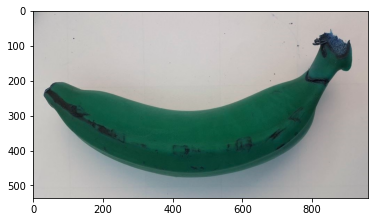

In [137]:
for category in categories:
    path = os.path.join(datadir, category) #path to the folder na dataset
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
        plt.imshow(img_array, cmap="hsv")
        plt.show()
        break
    break

In [138]:
print(img_array.shape)
print(img_array)

(536, 960, 3)
[[[148 156 156]
  [149 157 157]
  [150 158 158]
  ...
  [199 190 187]
  [199 190 187]
  [199 190 187]]

 [[149 157 157]
  [149 157 157]
  [150 158 158]
  ...
  [199 190 187]
  [199 190 187]
  [199 190 187]]

 [[149 157 157]
  [150 158 158]
  [151 159 159]
  ...
  [199 190 187]
  [199 190 187]
  [199 190 187]]

 ...

 [[199 197 197]
  [199 197 197]
  [199 197 197]
  ...
  [174 172 172]
  [174 172 172]
  [174 172 172]]

 [[199 197 197]
  [199 197 197]
  [199 197 197]
  ...
  [174 172 172]
  [174 172 172]
  [174 172 172]]

 [[199 197 197]
  [199 197 197]
  [199 197 197]
  ...
  [174 172 172]
  [174 172 172]
  [174 172 172]]]


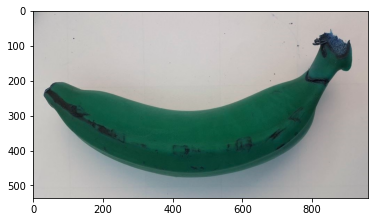

In [143]:
#img_size = 50
h = 536
w = 960

new_array = cv2.resize(img_array, (w, h))
plt.imshow(new_array, cmap = 'hsv')
plt.show()

In [144]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(datadir, category) #path to the folder na dataset
        class_num = categories.index(category)
        
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
                
create_training_data()

100%|██████████| 33/33 [00:00<00:00, 229.51it/s]


In [145]:
print(len(training_data))

185


In [146]:
import random

random.shuffle(training_data)

In [147]:
for sample in training_data:
    print(sample[1])

0
4
0
3
5
1
4
6
1
1
2
5
0
4
4
4
6
1
2
0
1
3
6
6
1
5
5
3
1
6
1
2
2
5
0
1
1
4
6
5
1
1
0
5
1
2
1
6
2
1
6
4
1
5
2
1
1
6
1
1
2
1
5
0
4
1
2
1
6
4
6
0
2
1
2
4
6
1
6
6
5
1
4
2
3
0
5
6
2
1
1
0
4
5
1
1
1
6
4
1
6
6
2
1
6
0
1
1
4
0
0
3
1
6
1
6
0
5
2
4
3
6
6
4
6
1
6
1
1
1
0
6
1
1
2
6
2
4
1
6
1
1
0
0
4
2
1
4
6
5
1
6
3
3
0
3
2
0
3
6
2
1
1
1
2
1
6
1
4
0
5
1
1
2
1
1
2
0
5
1
4
5
2
2
6


In [148]:
X = []
y = []
y = np.array(y)

In [149]:
for features, label in training_data:
    X.append(features)
    np.array((y, label))




<ipython-input-149-e34dc4852844>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array((y, label))


In [152]:
# X.reshape(-1, img_size, img_size, 3)
X = np.array(X).reshape(-1, w, h, 3)
print(X)

ValueError: cannot reshape array of size 462500 into shape (960,536,3)

In [151]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()